# Requirements

In [ ]:
# Install chromium, its driver, and selenium.
!apt update
!apt install chromium-chromedriver
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [589 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,012 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,389 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,185 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packag

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-MK" lang="en-MK" prefix="og: http://ogp.me/ns#" class="js no-touch progressive-image no-reduced-motion no-edge no-ie css-mask inline-video desktop no-tablet no-windows no-android no-retina no-safari no-old-safari chrome no-firefox no-iphone no-ipad ac-ls-visible ac-ls-fixed" data-layout-name="evergreen"><head>
	
































<meta charset="utf-8">
<link rel="canonical" href="https://www.apple.com/mk/">


	
	<link rel="alternate" href="https://www.apple.com/" hreflang="en-US"><link rel="alternate" href="https://www.apple.com/ae-ar/" hreflang="ar-AE"><link rel="alternate" href="https://www.apple.com/ae/" hreflang="en-AE"><link rel="alternate" href="https://www.apple.com/am/" hreflang="en-AM"><link rel="alternate" href="https://www.apple.com/at/" hreflang="de-AT"><link rel="alternate" href="https://www.apple.com/au/" hreflang="en-AU"><link rel="alternate" href="https://www.apple.com/az/" hreflang="en-AZ"><link rel=

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

iPhone 15 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [ ]:
# Write your code here.
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

import statistics
import requests

from bs4 import BeautifulSoup
from IPython.display import HTML

from datetime import datetime
from datetime import date

In [ ]:
# Add as many code boxes as you need.
requests.packages.urllib3.disable_warnings()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
snapshot_url='https://www.scrapethissite.com/pages/forms/'
#snapshot=requests.get(snapshot_url)
snapshot=browser.get(snapshot_url)

In [ ]:
print(browser.page_source)

<html lang="en"><head>
    <meta charset="utf-8">
    <title>Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components.">

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">
    <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css">
    <link rel="stylesheet" type="text/css" href="/static/css/styles.css">

    
<meta name="robots"

In [ ]:
team_names=browser.find_elements(By.CSS_SELECTOR,'td.name')
[element.text for element in team_names]

['Boston Bruins',
 'Buffalo Sabres',
 'Calgary Flames',
 'Chicago Blackhawks',
 'Detroit Red Wings',
 'Edmonton Oilers',
 'Hartford Whalers',
 'Los Angeles Kings',
 'Minnesota North Stars',
 'Montreal Canadiens',
 'New Jersey Devils',
 'New York Islanders',
 'New York Rangers',
 'Philadelphia Flyers',
 'Pittsburgh Penguins',
 'Quebec Nordiques',
 'St. Louis Blues',
 'Toronto Maple Leafs',
 'Vancouver Canucks',
 'Washington Capitals',
 'Winnipeg Jets',
 'Boston Bruins',
 'Buffalo Sabres',
 'Calgary Flames',
 'Chicago Blackhawks']

In [ ]:
team_wins = browser.find_elements(By.CSS_SELECTOR, 'td.wins')
[element.text for element in team_wins]


['44',
 '31',
 '46',
 '49',
 '34',
 '37',
 '31',
 '46',
 '27',
 '39',
 '32',
 '25',
 '36',
 '33',
 '41',
 '16',
 '47',
 '23',
 '28',
 '37',
 '26',
 '36',
 '31',
 '31',
 '36']

In [ ]:
team_years = browser.find_elements(By.CSS_SELECTOR, 'td.year')
[element.text for element in team_years]


['1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1991',
 '1991',
 '1991',
 '1991']

In [ ]:
team_losses = browser.find_elements(By.CSS_SELECTOR, 'td.losses')
[element.text for element in team_losses]

['24',
 '30',
 '26',
 '23',
 '38',
 '37',
 '38',
 '24',
 '39',
 '30',
 '33',
 '45',
 '31',
 '37',
 '33',
 '50',
 '22',
 '46',
 '43',
 '36',
 '43',
 '32',
 '37',
 '37',
 '29']

In [ ]:
matrix=[]
for i in range(0,len(team_names)):
  matrix.append([team_names[i].text,team_wins[i].text,team_losses[i].text,team_years[i].text])
  df=pd.DataFrame(np.array(matrix),columns=['Team Name','Team Wins','Team Losses','Team Years'])


In [ ]:
df

,Team Name,Team Wins,Team Losses,Team Years
0,Boston Bruins,44,24,1990
1,Buffalo Sabres,31,30,1990
2,Calgary Flames,46,26,1990
3,Chicago Blackhawks,49,23,1990
4,Detroit Red Wings,34,38,1990
5,Edmonton Oilers,37,37,1990
6,Hartford Whalers,31,38,1990
7,Los Angeles Kings,46,24,1990
8,Minnesota North Stars,27,39,1990
9,Montreal Canadiens,39,30,1990


<Axes: >

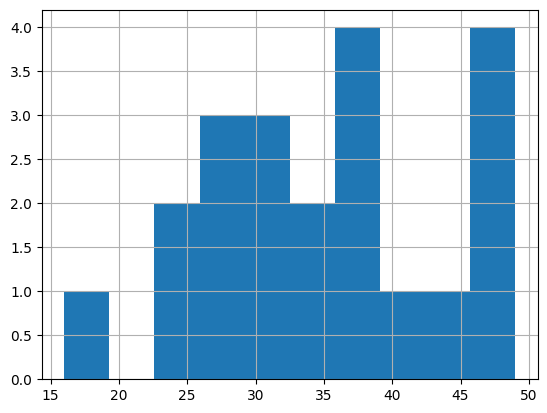

In [ ]:
df[df['Team Years'] == '1990']['Team Wins'].apply(int).hist()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [ ]:
# Write your code here.

In [ ]:
# Add as many code boxes as you need.